# Predicting heart disease using machine learning

## Features

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

In [2]:

# Importing Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

In [6]:
# Kaggle link :https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

df = pd.read_csv("/content/drive/MyDrive/Supervised_learning_project/heart_disease.csv")
df.shape

(303, 15)

## Data Exploration (exploratory data analysis or EDA)

In [7]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
df.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [8]:
df["target"].value_counts()

yes    165
no     138
Name: target, dtype: int64

In [9]:
dummy1=pd.get_dummies(df.target)
dummy2=pd.get_dummies(df.sex)
print(dummy1)
dummy2


     no  yes
0     0    1
1     0    1
2     0    1
3     0    1
4     0    1
..   ..  ...
298   1    0
299   1    0
300   1    0
301   1    0
302   1    0

[303 rows x 2 columns]


,female,male
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
298,1,0
299,0,1
300,0,1
301,0,1


In [10]:
df.drop(["target","sex"],inplace=True,axis=1)
df=pd.concat([df,dummy1.yes], axis=1)
df=pd.concat([df,dummy2.male], axis=1)
df

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,yes,male
0,0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,1
2,2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,0
3,3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,1
4,4,57,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0,0
299,299,45,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0,1
300,300,68,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0,1
301,301,57,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,0,1


In [11]:
df=df.rename(columns={'yes':"target",'male':'sex'})
df

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex
0,0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,1
2,2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,0
3,3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,1
4,4,57,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0,0
299,299,45,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0,1
300,300,68,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0,1
301,301,57,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,0,1


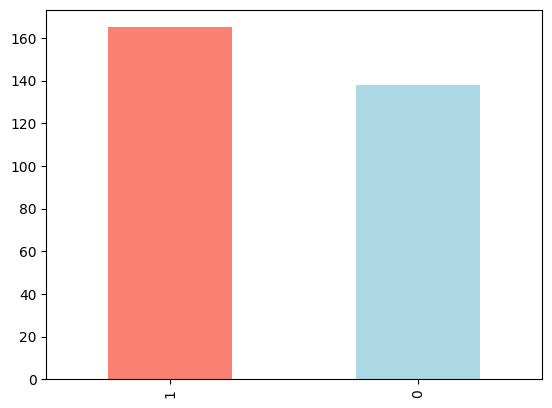

In [12]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trestbps    299 non-null    float64
 4   chol        302 non-null    float64
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     298 non-null    float64
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          303 non-null    int64  
 12  thal        303 non-null    int64  
 13  target      303 non-null    uint8  
 14  sex         303 non-null    uint8  
dtypes: float64(4), int64(9), uint8(2)
memory usage: 31.5 KB


In [14]:
df.isna().sum()

Unnamed: 0    0
age           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
sex           0
dtype: int64

In [15]:
df.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex
count,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.683168
std,87.612784,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.466011
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,151.000000,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


### Heart Disease Frequency according to Sex

In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


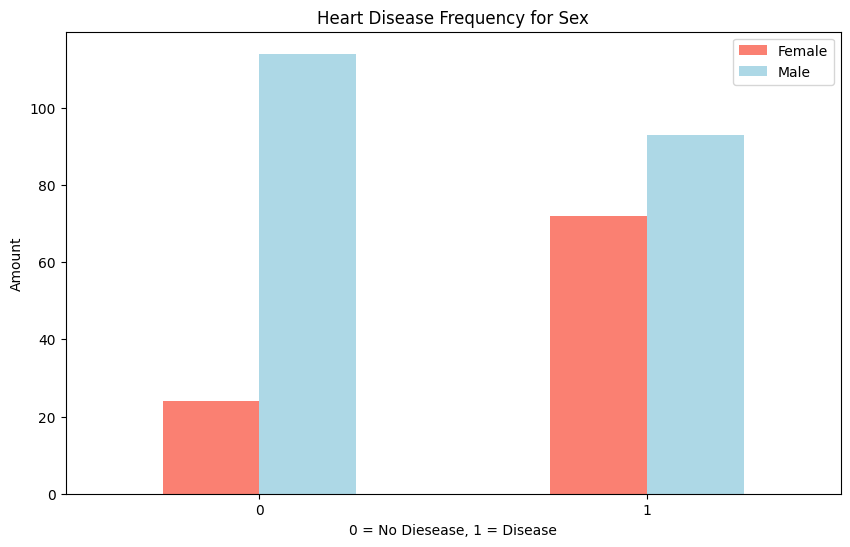

In [26]:
# plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

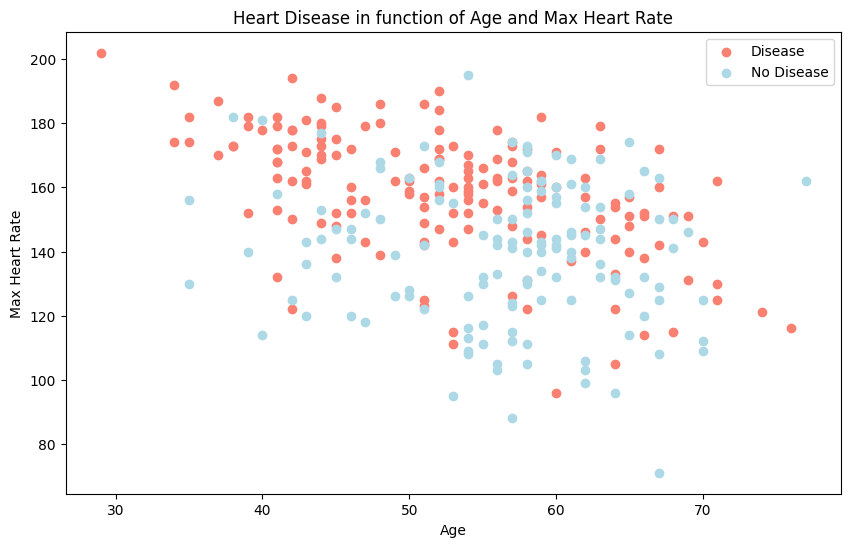

In [27]:
# Plotting a Scatter Plot
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

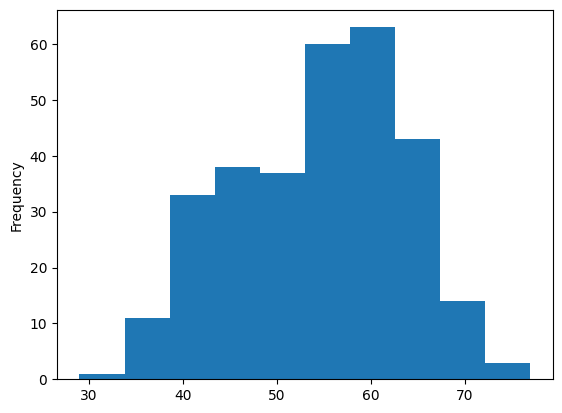

In [28]:
# Distribution of the age
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

 cp - chest pain type

    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [29]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


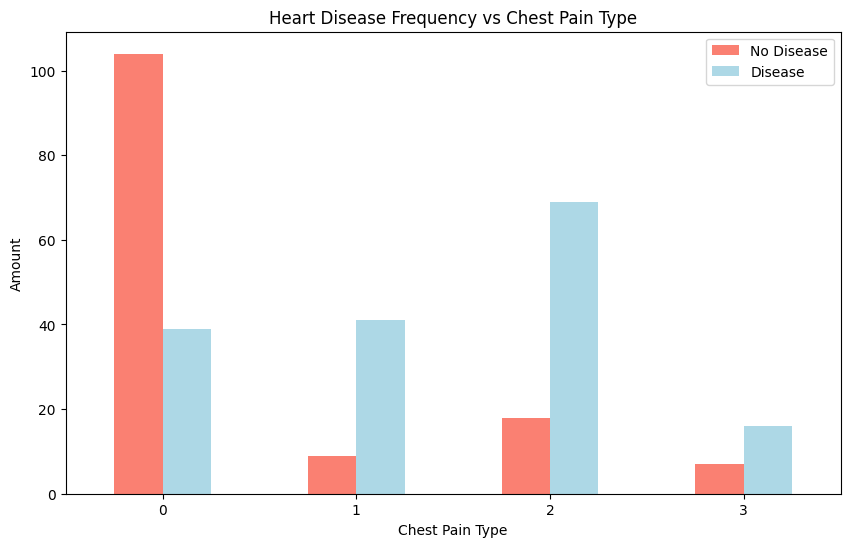

In [30]:
# Heart Disease frequency vs Chest Pain type
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency vs Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [31]:
df.head()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex
0,0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,1
2,2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,0
3,3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,1
4,4,57,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1,0


In [32]:
# correlation matrix
df.corr()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex
Unnamed: 0,1.000000,0.185153,-0.399163,0.103337,0.021627,0.000743,-0.021130,-0.393974,0.363788,0.298161,-0.276484,0.384962,0.257403,-0.862585,0.201132
age,0.185153,1.000000,-0.068653,0.279570,0.213465,0.121308,-0.116211,-0.396302,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,-0.098447
cp,-0.399163,-0.068653,1.000000,0.048142,-0.078008,0.094444,0.044421,0.301567,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.049353
trestbps,0.103337,0.279570,0.048142,1.000000,0.127278,0.175885,-0.110966,-0.029729,0.070183,0.193827,-0.121380,0.098499,0.060437,-0.142035,-0.064347
chol,0.021627,0.213465,-0.078008,0.127278,1.000000,0.012865,-0.150330,-0.022939,0.066362,0.053098,-0.003027,0.070807,0.098328,-0.086563,-0.197387
fbs,0.000743,0.121308,0.094444,0.175885,0.012865,1.000000,-0.084189,0.001599,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.045032
restecg,-0.021130,-0.116211,0.044421,-0.110966,-0.150330,-0.084189,1.000000,0.037393,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.058196
thalach,-0.393974,-0.396302,0.301567,-0.029729,-0.022939,0.001599,0.037393,1.000000,-0.396211,-0.346806,0.380764,-0.208967,-0.106621,0.413252,-0.051491
exang,0.363788,0.096801,-0.394280,0.070183,0.066362,0.025665,-0.070733,-0.396211,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.141664
oldpeak,0.298161,0.210013,-0.149230,0.193827,0.053098,0.005747,-0.058770,-0.346806,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.096093


(15.5, -0.5)

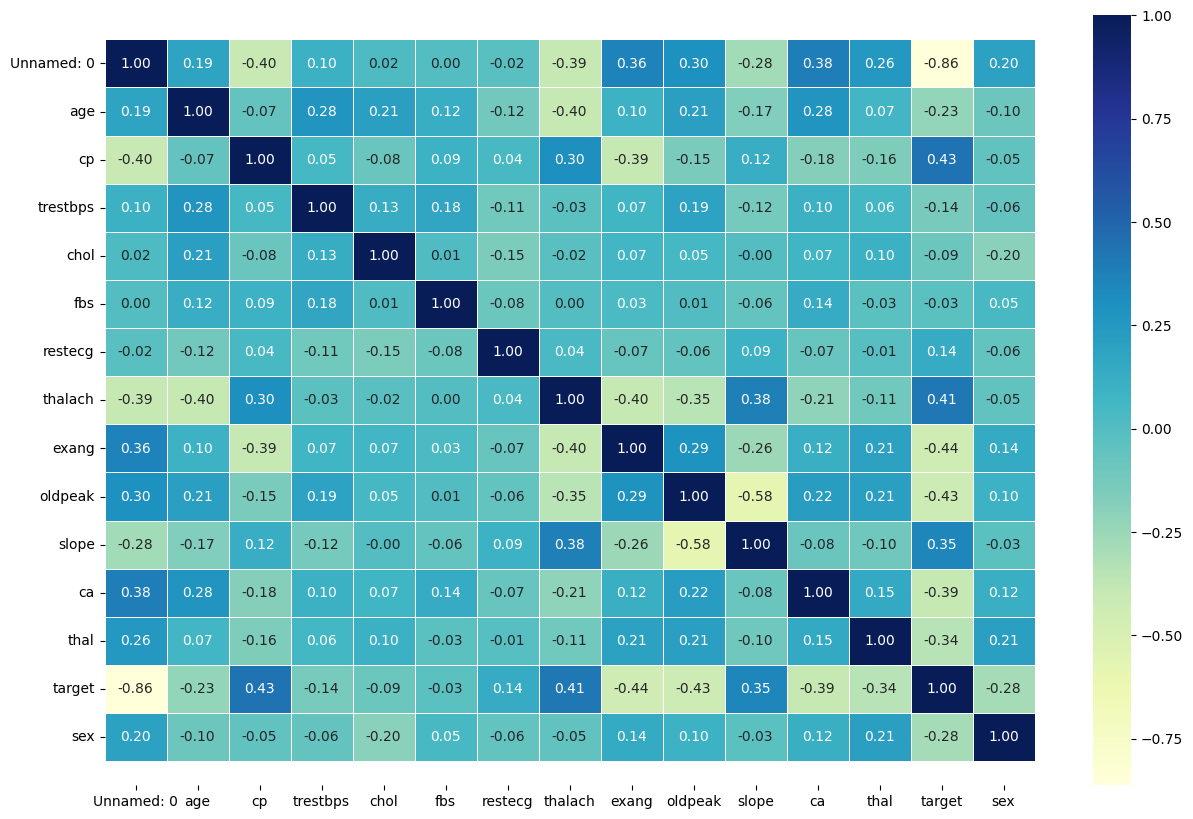

In [33]:
# Heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Modelling

In [34]:
df.head()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex
0,0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,1
2,2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,0
3,3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,1
4,4,57,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1,0


In [35]:
df.dropna(inplace=True)
df.isna().sum()

Unnamed: 0    0
age           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
sex           0
dtype: int64

In [37]:
# Splitting data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [47]:
print(y)
print('\n','\n')
X

0      1
1      1
2      1
3      1
5      1
      ..
296    0
298    0
299    0
300    0
302    0
Name: target, Length: 293, dtype: uint8

 



,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex
0,0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,0
3,3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,5,57,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,296,63,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2,0
298,298,57,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,299,45,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,1
300,300,68,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,1


In [38]:
#setting random seed
np.random.seed(42)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [48]:
X_train

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex
217,217,63,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3,1
236,236,58,0,125.0,300.0,0,0,171.0,0,0.0,2,2,3,1
233,233,64,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2,1
76,76,51,2,125.0,245.0,1,0,166.0,0,2.4,1,0,2,1
27,27,51,2,110.0,175.0,0,1,123.0,0,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,60,2,140.0,185.0,0,0,155.0,0,3.0,1,0,2,1
74,74,43,2,122.0,213.0,0,1,165.0,0,0.2,1,0,2,0
110,110,64,0,180.0,325.0,0,1,154.0,1,0.0,2,0,2,0
278,278,58,1,136.0,319.0,1,0,152.0,0,0.0,2,2,2,0


In [49]:
y_train

217    0
236    0
233    0
76     1
27     1
      ..
194    0
74     1
110    1
278    0
106    1
Name: target, Length: 234, dtype: uint8

In [52]:
# Putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    """
    Fits and evaluates given machine learning models.

    """
    # Setting random seed
    np.random.seed(42)

    # A dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [56]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9830508474576272, 'KNN': 1.0, 'Random Forest': 1.0}

### Model Comparison

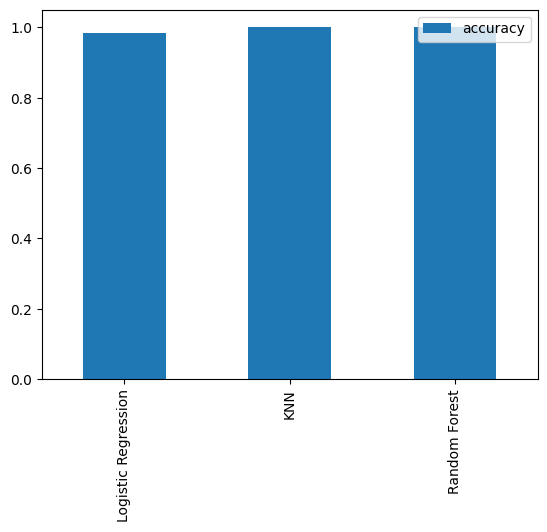

In [57]:
#result : {'Logistic Regression': 0.9830508474576272, 'KNN': 1.0, 'Random Forest': 1.0}

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning with RandomizedSearchCV

tuning:
* LogisticRegression()

... using RandomizedSearchCV

In [58]:
# hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


In [59]:
# Tune LogisticRegression

np.random.seed(42)

# Setting random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [60]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [61]:
rs_log_reg.score(X_test, y_test)

0.9830508474576272

## Hyperparamter Tuning with GridSearchCV


In [62]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [63]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [64]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.9830508474576272

## Evaluting The Tuned machine learning classifier

In [65]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [66]:
y_preds

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=uint8)

In [67]:
y_test

87     1
268    0
47     1
182    0
148    1
129    1
234    0
122    1
10     1
94     1
152    1
283    0
35     1
289    0
228    0
80     1
48     1
6      1
238    0
251    0
128    1
245    0
287    0
105    1
78     1
279    0
282    0
113    1
63     1
208    0
44     1
59     1
293    0
121    1
62     1
170    0
290    0
117    1
164    1
66     1
151    1
69     1
277    0
163    1
187    0
32     1
24     1
26     1
285    0
123    1
253    0
82     1
19     1
178    0
220    0
183    0
189    0
173    0
7      1
Name: target, dtype: uint8

In [68]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[24  1]
 [ 0 34]]


Classification report

In [70]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.97      1.00      0.99        34

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



### Evaluation metrics using cross-validation

In [71]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [72]:
# A new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [73]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.86440678, 1.        , 1.        , 1.        , 0.70689655])

In [74]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9142606662770308

In [75]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.96

In [76]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.89375

In [77]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.905437352245863

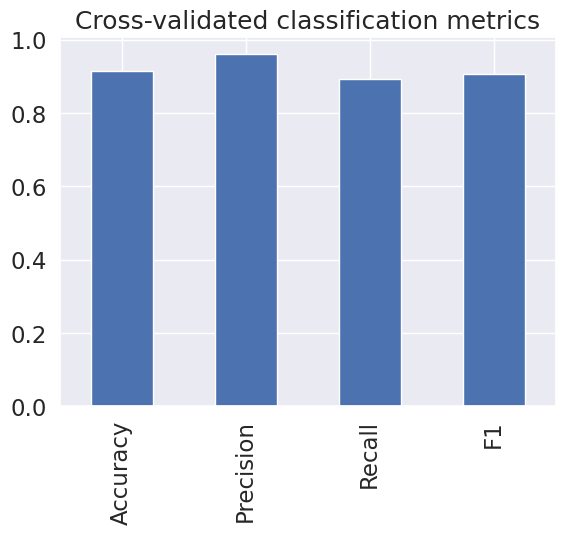

In [78]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);